In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

In [5]:
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [6]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [8]:
a=df.label.value_counts()
print(a)
print("TOTAL: ",df.label.count())



male      1584
female    1584
Name: label, dtype: int64
TOTAL:  3168


In [9]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [10]:
df.label = [1 if each == "female" else 0 for each in df.label]

In [11]:
df.label

0       0
1       0
2       0
3       0
4       0
       ..
3163    1
3164    1
3165    1
3166    1
3167    1
Name: label, Length: 3168, dtype: int64

In [12]:
y = df.label.values
x = df.drop(['label'],axis='columns')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 50)
algo_names=[]
algo_scores=[]


In [13]:
x_train.shape

(2534, 20)

In [14]:
x_test.shape

(634, 20)

In [15]:
x_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
974,0.188291,0.060757,0.196792,0.128553,0.243459,0.114906,1.924342,6.921315,0.898536,0.359334,0.117107,0.188291,0.130205,0.048096,0.274286,1.341518,0.023438,5.414062,5.390625,0.112298
2769,0.187396,0.044700,0.185598,0.171349,0.206260,0.034911,2.454544,9.671798,0.878222,0.354332,0.174198,0.187396,0.155880,0.048534,0.277457,1.388672,0.023438,6.609375,6.585938,0.109103
1805,0.177266,0.033878,0.175619,0.166018,0.188938,0.022920,3.261121,14.297520,0.816742,0.226999,0.164469,0.177266,0.164342,0.020833,0.250000,0.596128,0.078125,6.203125,6.125000,0.146104
175,0.134962,0.062047,0.111388,0.088780,0.189571,0.100791,2.317095,9.072179,0.931091,0.560896,0.104794,0.134962,0.086565,0.016277,0.275862,0.329346,0.007812,4.265625,4.257812,0.132783
1919,0.097562,0.070847,0.071001,0.038766,0.158224,0.119458,1.430850,4.652448,0.952220,0.664712,0.038555,0.097562,0.148914,0.019851,0.222222,0.255774,0.007812,0.640625,0.632812,0.305836


In [16]:
x_train.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2014,0.142297,0.083138,0.169747,0.058402,0.217596,0.159194,1.963700,7.248161,0.955880,0.700716,0.229604,0.142297,0.178167,0.017877,0.238806,0.308190,0.007812,0.781250,0.773438,0.387335
2157,0.183551,0.033172,0.187811,0.178004,0.196637,0.018634,3.361455,14.422563,0.785318,0.235786,0.192715,0.183551,0.177953,0.060377,0.246154,0.622596,0.179688,5.765625,5.585938,0.167133
1931,0.162205,0.069786,0.182035,0.136821,0.210530,0.073709,4.105541,35.655663,0.930920,0.575286,0.000000,0.162205,0.149335,0.027257,0.225352,0.663462,0.007812,6.960938,6.953125,0.187743
1504,0.117170,0.076995,0.108125,0.050000,0.201406,0.151406,10.649260,228.008040,0.944999,0.653185,0.000000,0.117170,0.111191,0.015640,0.258065,0.081182,0.007812,1.343750,1.335938,0.094542
1712,0.240844,0.053585,0.256984,0.236169,0.268792,0.032623,3.203079,14.252101,0.824963,0.201548,0.268392,0.240844,0.225755,0.062745,0.275862,0.638849,0.007812,4.078125,4.070312,0.156384


In [17]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state = 50)
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
algo_names.append("Decision Tree")
algo_scores.append(dec_tree.score(x_test,y_test))
p1=dec_tree.predict(x_test)


Decision Tree Classification Score:  0.9511041009463722


In [18]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(random_state = 50)
rand_forest.fit(x_train,y_train)
print("Random Forest Classification Score: ",rand_forest.score(x_test,y_test))
algo_names.append("Random Forest")
algo_scores.append(rand_forest.score(x_test,y_test))
p2=rand_forest.predict(x_test)

Random Forest Classification Score:  0.973186119873817


In [19]:
from sklearn.svm import SVC
svm = SVC(random_state = 50)
svm.fit(x_train,y_train)
print("SVM Classification Score: {}".format(svm.score(x_test,y_test)))
algo_names.append("SVM")
algo_scores.append(svm.score(x_test,y_test))
p3=svm.predict(x_test)


SVM Classification Score: 0.6750788643533123


In [20]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))
algo_names.append("Naive Bayes")
algo_scores.append(naive_bayes.score(x_test,y_test))
p4=naive_bayes.predict(x_test)

Naive Bayes Classification Score: 0.8943217665615142


Text(0, 0.5, 'Algorithm Score')

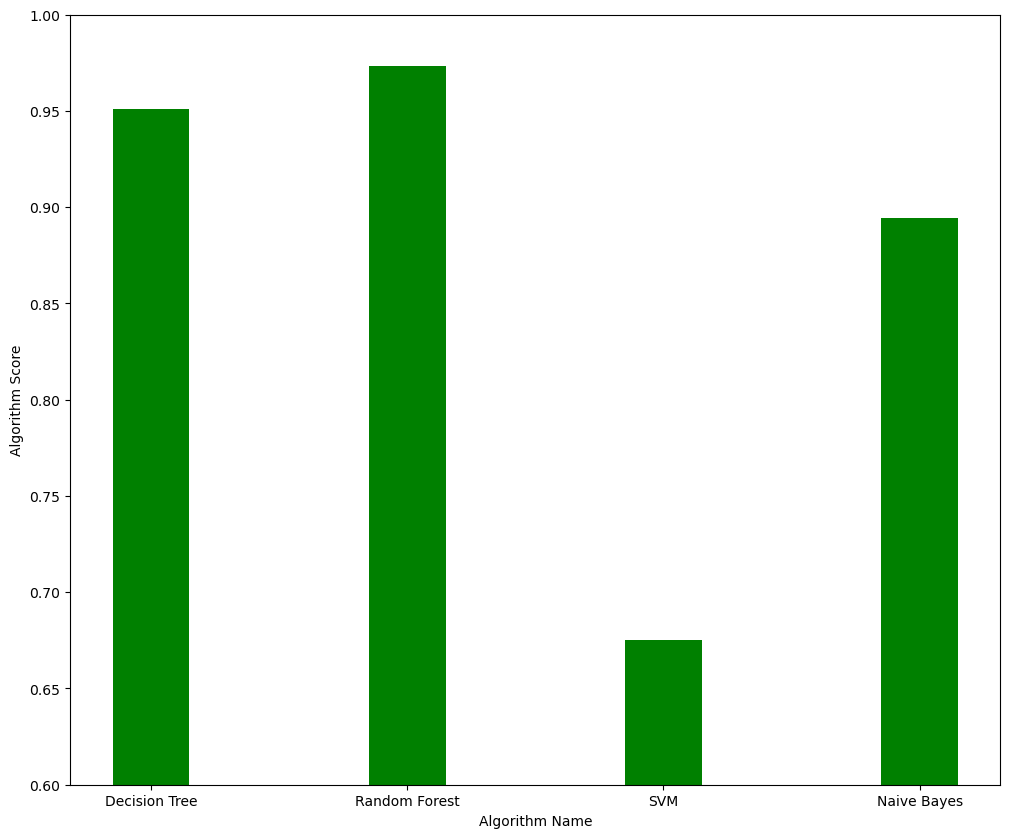

In [21]:
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(algo_names,algo_scores,width=0.3,color=['green'])
plt.xlabel('Algorithm Name')
plt.ylabel('Algorithm Score')


In [22]:
from sklearn.metrics import classification_report

In [23]:
report_dec_tree=classification_report(y_test,p1)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       310
           1       0.95      0.95      0.95       324

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



In [24]:
report_random_forest=classification_report(y_test,p2)
print(report_random_forest)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       310
           1       0.97      0.98      0.97       324

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [25]:
report_svm=classification_report(y_test,p3)
print(report_svm)

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       310
           1       0.77      0.52      0.62       324

    accuracy                           0.68       634
   macro avg       0.70      0.68      0.67       634
weighted avg       0.70      0.68      0.67       634



In [26]:
report_naive_bayes=classification_report(y_test,p4)
print(report_naive_bayes)

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       310
           1       0.90      0.89      0.90       324

    accuracy                           0.89       634
   macro avg       0.89      0.89      0.89       634
weighted avg       0.89      0.89      0.89       634



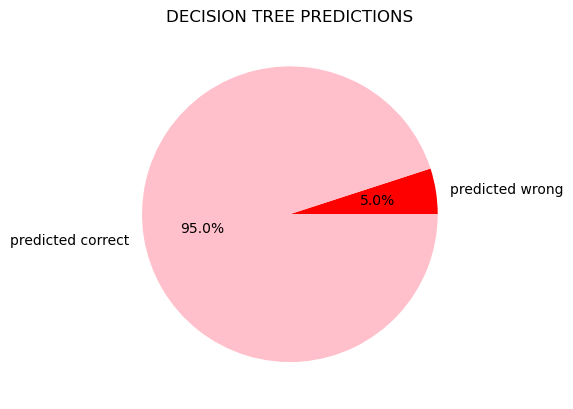

In [27]:
comp1=[31.7,602.3]
l1=['predicted wrong','predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['red','pink'])
plt.title('DECISION TREE PREDICTIONS')
plt.show()

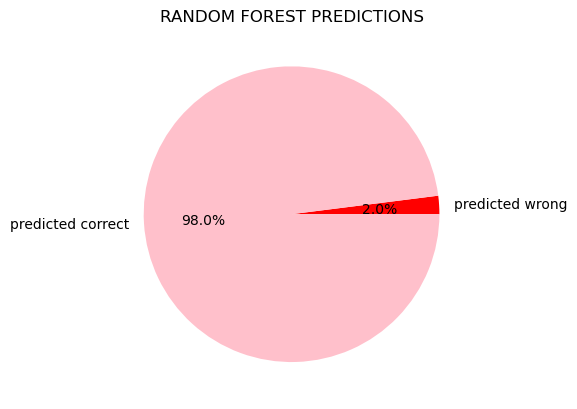

In [28]:
comp2=[12.68,621.32]
l2=['predicted wrong','predicted correct']
plt.pie(comp2,labels=l2,autopct='%0.1f%%',colors=['red','pink'])
plt.title('RANDOM FOREST PREDICTIONS')
plt.show()

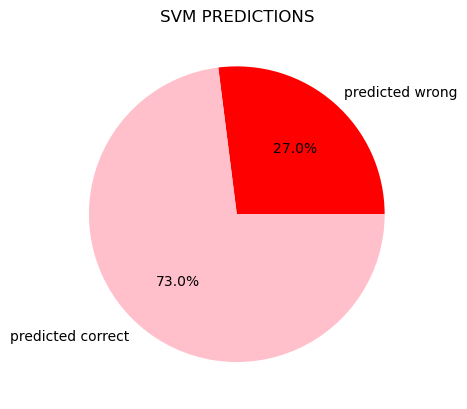

In [29]:
comp3=[171.18,462.82]
l3=['predicted wrong','predicted correct']
plt.pie(comp3,labels=l3,autopct='%0.1f%%',colors=['red','pink'])
plt.title('SVM PREDICTIONS')
plt.show()

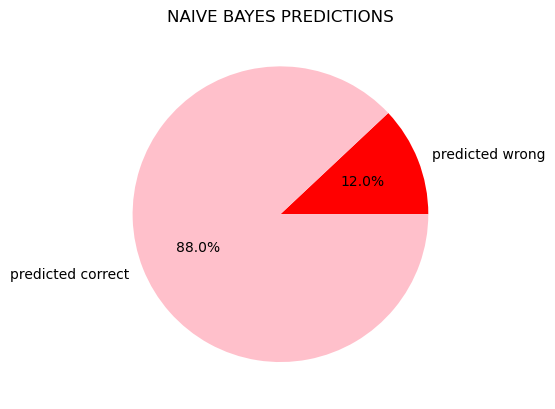

In [30]:
comp4=[76.08,557.92]
l4=['predicted wrong','predicted correct']
plt.pie(comp4,labels=l4,autopct='%0.1f%%',colors=['red','pink'])
plt.title('NAIVE BAYES PREDICTIONS')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix

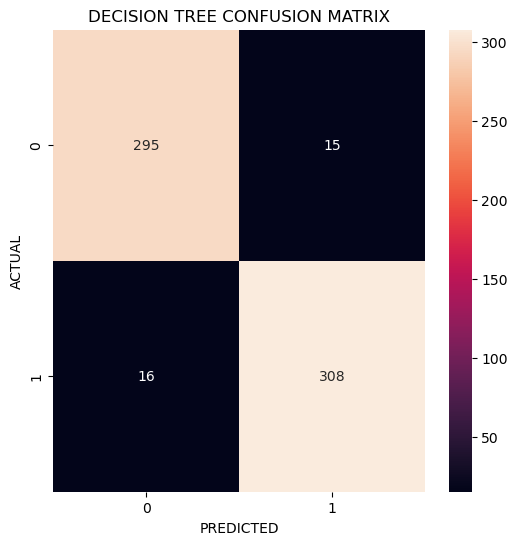

In [32]:
conf_mat1 = confusion_matrix(y_test,p1)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat1,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("DECISION TREE CONFUSION MATRIX")
plt.show()

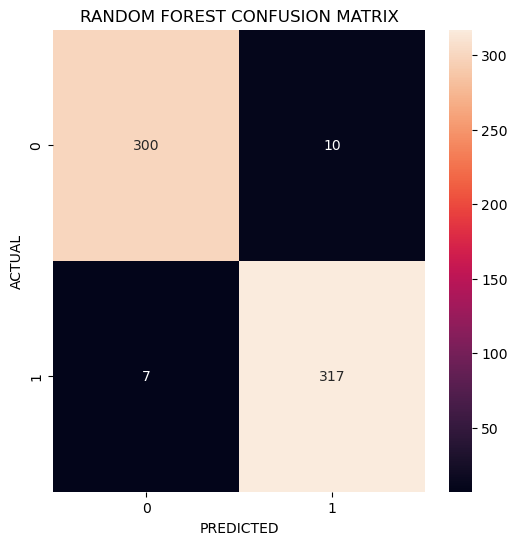

In [33]:
conf_mat2 = confusion_matrix(y_test,p2)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("RANDOM FOREST CONFUSION MATRIX")
plt.show()

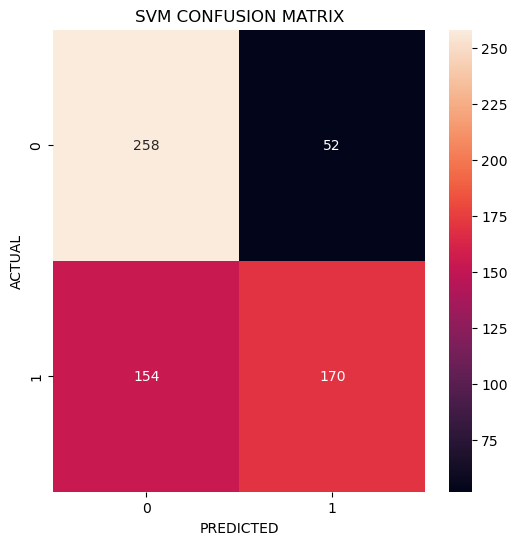

In [34]:
conf_mat3 = confusion_matrix(y_test,p3)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat3,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("SVM CONFUSION MATRIX")
plt.show()

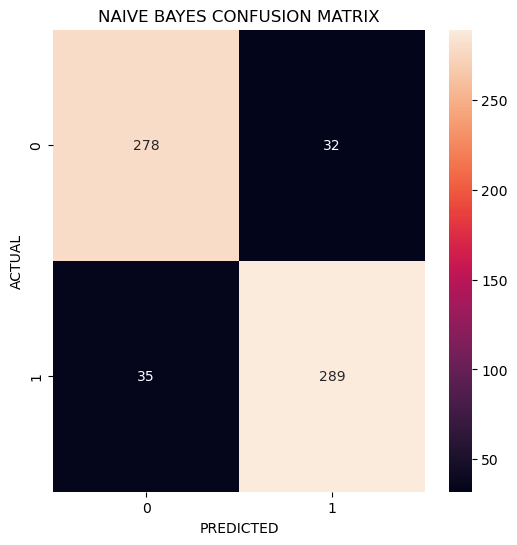

In [35]:
conf_mat4 = confusion_matrix(y_test,p4)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat4,annot=True,fmt=".0f")
plt.ylabel("ACTUAL")
plt.xlabel("PREDICTED")
plt.title("NAIVE BAYES CONFUSION MATRIX")
plt.show()

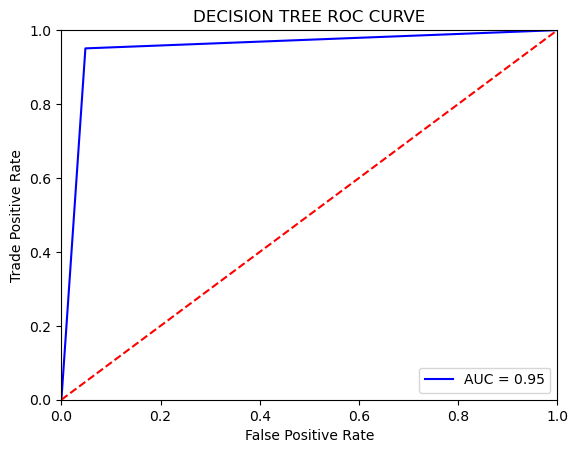

DECISION TREE ROC AUC: 0.951115093588212


In [36]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
b=[]
probs1=dec_tree.predict_proba(x_test)
preds1=probs1[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test, preds1)
roc_auc1 = auc(fpr1, tpr1)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Trade Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("DECISION TREE ROC CURVE")
plt.show()
b.append(roc_auc1)
print("DECISION TREE ROC AUC:",roc_auc_score(y_test,preds1))

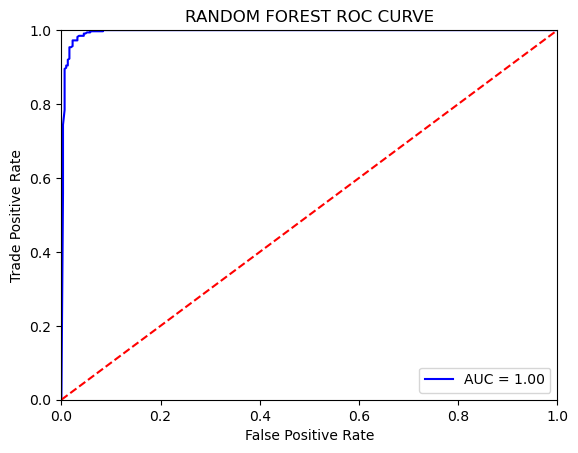

RANDOM FOREST ROC AUC: 0.9950766626841895


In [37]:
probs2=rand_forest.predict_proba(x_test)
preds2=probs2[:,1]
fpr2, tpr2, threshold2 = roc_curve(y_test, preds2)
roc_auc2 = auc(fpr2, tpr2)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Trade Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("RANDOM FOREST ROC CURVE")
plt.show()
b.append(roc_auc2)
print("RANDOM FOREST ROC AUC:",roc_auc_score(y_test,preds2))

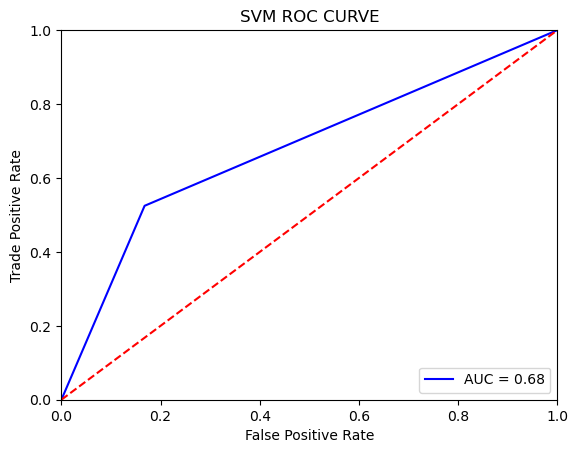

SVM ROC AUC: 0.6784747112704103


In [38]:
fpr3, tpr3, threshold3 = roc_curve(y_test, p3)
roc_auc3 = auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Trade Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("SVM ROC CURVE")
plt.show()
b.append(roc_auc3)
print("SVM ROC AUC:",roc_auc_score(y_test,p3))

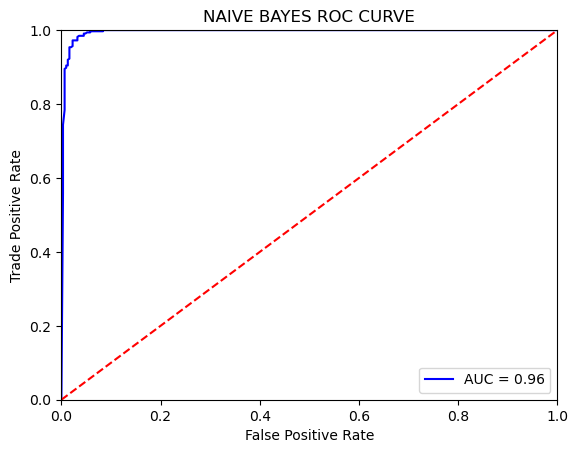

NAIVE BAYES AUC: 0.9574273197929112


In [39]:
probs3=naive_bayes.predict_proba(x_test)
preds3=probs3[:,1]
fpr4, tpr4, threshold4 = roc_curve(y_test, preds3)
roc_auc4 = auc(fpr4, tpr4)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Trade Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("NAIVE BAYES ROC CURVE")
plt.show()
b.append(roc_auc4)
print("NAIVE BAYES AUC:",roc_auc_score(y_test,preds3))

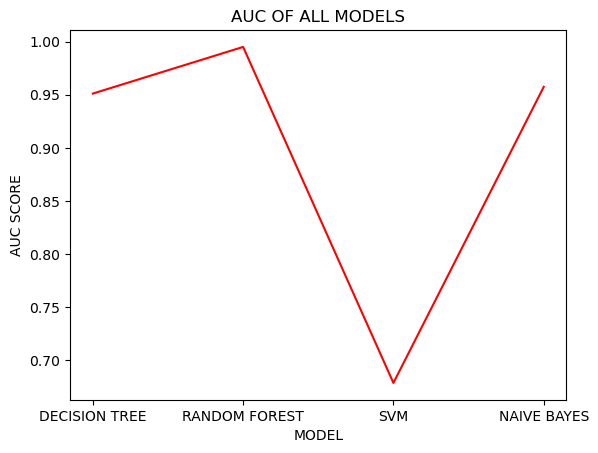

In [40]:
a=["DECISION TREE","RANDOM FOREST","SVM","NAIVE BAYES"]
plt.plot(a,b,color='red')
plt.title('AUC OF ALL MODELS')
plt.xlabel('MODEL')
plt.ylabel('AUC SCORE')
plt.show()

In [41]:
import pickle

In [42]:
filename='model.pkl'
pickle.dump(rand_forest,open(filename,'wb'))

In [43]:
import librosa

E:\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [44]:
def rmse(x):
    return np.sum(x**2)

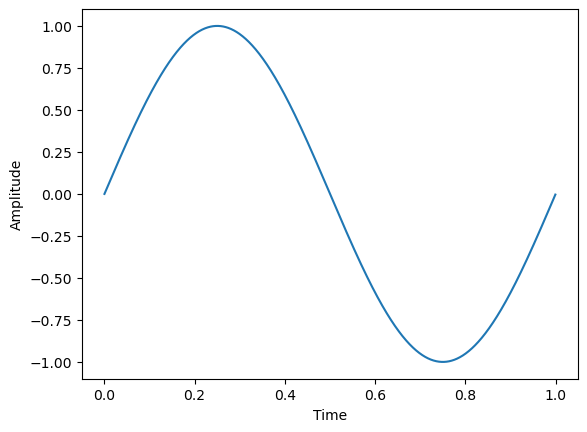

In [45]:
A = 1                      # Amplitude
f0 = 1                     # frequency
Fs = 1600                  # Sampling frequency
t = np.arange(0, 1, 1/Fs) 

X = A * np.sin(2 * np.pi * f0 * t)

plt.plot(t, X)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [46]:
import librosa
audio_path = 'hello.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [47]:
librosa.load(audio_path, sr=44100)

(array([ 0.        ,  0.        ,  0.        , ..., -0.042454  ,
        -0.0737887 , -0.06796335], dtype=float32),
 44100)

In [48]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [49]:
def get_features(frequencies):

  nobs, minmax, mean, variance, skew, kurtosis =  stats.describe(frequencies)
  median   = np.median(frequencies)
  mode     = stats.mode(frequencies).mode[0]
  std      = np.std(frequencies)
  low,peak = minmax
  q75,q25  = np.percentile(frequencies, [75 ,25])
  iqr      = q75 - q25
  return nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr


In [50]:
def main():

  samples = [d for d in os.listdir(raw_folder) if os.path.isdir(os.path.join(raw_folder, d))]
  n_samples = len(samples)

  columns=['nobs', 'mean', 'skew', 'kurtosis', 
  'median', 'mode', 'std', 'low', 
  'peak', 'q25', 'q75', 'iqr']

In [51]:
import os

In [52]:
    if os.path.isdir(audio_path): #some of the samples don't contain a wav folder (Ex: 'LunaTick-20080329-vf1')
      frequencies = get_frequencies(audio_path)
      if len(frequencies) > 10: 
        #for some of the files (ex: Aaron-20130527-giy) 
        #I only recover frequencies of 0.0 (even if I don't split in chunks) which is not integrated into my lol and frequencies is empty
        nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr = get_features(frequencies)
        sample_dict = {'nobs':nobs, 'mean':mean, 'skew':skew, 'kurtosis':kurtosis,
                       'median':median, 'mode':mode, 'std':std, 'low': low,
                       'peak':peak, 'q25':q25, 'q75':q75, 'iqr':iqr}
        print("\nappending %s sample %s : %s"%(gender, sample, sample_dict))

        myData.loc[i] = pd.Series(sample_dict)

  myData.to_csv('input.csv')


[[-576.77783   -576.77783   -576.77783   ... -201.3666    -152.05852
  -120.389275 ]
 [   0.           0.           0.        ...   90.14864     25.430729
    11.422982 ]
 [   0.           0.           0.        ...  -11.851131    19.016094
    21.657692 ]
 ...
 [   0.           0.           0.        ...   -3.855165    -6.1575603
    -7.760638 ]
 [   0.           0.           0.        ...  -17.854984   -13.354469
    -7.9918423]
 [   0.           0.           0.        ...  -13.852813     1.8622367
    13.174959 ]]
[-172.05264      93.87819      -6.4014616    20.801445      1.3918568
    5.8437176    11.105008      3.7448463     2.0204287    11.9302845
   -7.547868     14.883715     -7.587228      6.419181     -7.6635194
    2.006        -7.987858      2.9726543    -7.8111687    -0.45179778]
(20,)


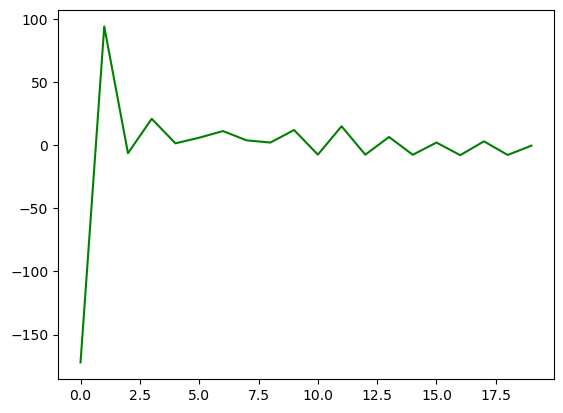

In [53]:
import numpy as np
import pandas as pd
import librosa as lib
import librosa.display
import matplotlib.pyplot as plt
import pickle
filename='model.pkl'
classifier=pickle.load(open(filename, 'rb'))
audioData = []
srate = []

data,sr = lib.load("hello.wav")
mfcc = librosa.feature.mfcc(y=data, sr=sr)
print(mfcc)

mfccScaled = np.mean(mfcc.T, axis=0)
print(mfccScaled)
print(mfccScaled.shape)
plt.plot(mfccScaled, 'g')
plt.show()

In [54]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask, jsonify, request
import numpy as np
import librosa
import joblib

# load the trained machine learning model
model = joblib.load('model.pkl')

app = Flask(__name__)

def extract_features(audio_file):
    # load the audio file
    y, sr = librosa.load(hello.wav)

    # extract features using librosa
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # compute the mean of each feature
    features = np.mean(mfccs, axis=1)

    return features

@app.route('/', methods=['POST'])
def predict():
    # get the audio file from the request
    audio_file = request.files['audio_file']

    # preprocess the audio file
    features = extract_features(audio_file)

    # convert the features into a numpy array
    features_array = np.array([features])

    # make a prediction using the machine learning model
    prediction = model.predict(features_array)[0]

    # return the prediction as a JSON response
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
        app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Mar/2023 16:26:49] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [23/Mar/2023 16:31:57] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [23/Mar/2023 16:37:52] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [23/Mar/2023 17:08:29] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [23/Mar/2023 17:08:29] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Mar/2023 17:09:00] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [23/Mar/2023 17:09:07] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [23/Mar/2023 17:09:17] "GET / HTTP/1.1" 405 -
127.0.0.1 - - [23/Mar/2023 17:09:26] "GET /%20error HTTP/1.1" 404 -
127.0.0.1 - - [23/Mar/2023 17:09:44] "GET /%20meanng HTTP/1.1" 404 -
